In [1]:
import sys
sys.path.append("..")

from model import VQModel

import torch

In [2]:
model = VQModel().eval()

Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


In [3]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(model)

68718467

In [4]:
sd = torch.load('../weights/vqgan.ckpt', map_location='cpu', weights_only=True)['state_dict']
model.load_state_dict(sd, strict=False)

_IncompatibleKeys(missing_keys=[], unexpected_keys=['custom_layer.weight', 'custom_layer.bias'])

In [5]:
from model.vqgan.image_tokenizer import ImageTokenizer
tokenizer = ImageTokenizer(model)

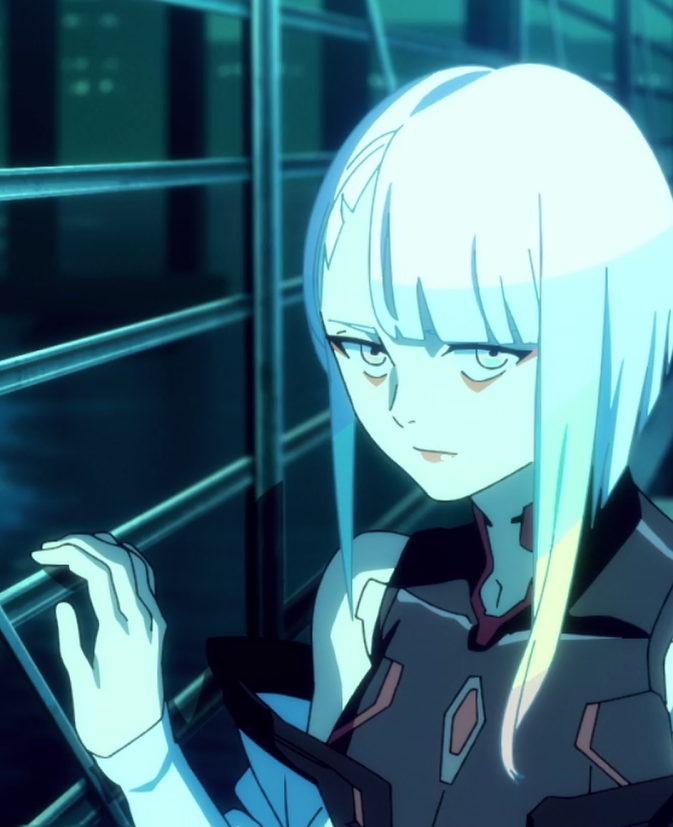

In [6]:
from PIL import Image
image = Image.open('../data/test.png')
image

In [7]:
tokens = tokenizer.img_tokens_from_pil([image])
tokens, tokens.shape

(tensor([[3414, 2385, 3446,  ..., 4798, 1972, 2283]]), torch.Size([1, 1024]))

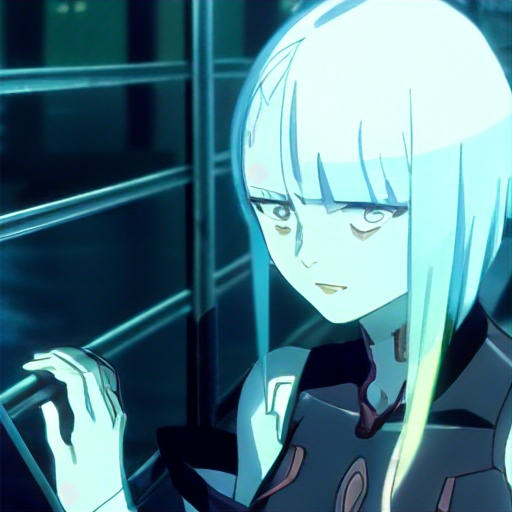

In [8]:
tokenizer.pil_from_img_toks(tokens)[0]

In [9]:
from model.vqgan.image_tokenizer import TiledImageTokenizer
tiled_tokenizer = TiledImageTokenizer(model, max_height=1024, tile_size=512, row_separator=-1, tile_separator=-2)

In [10]:
tokens = tiled_tokenizer.img_tokens_from_pil([image])
tokens, tokens.shape

(tensor([[ 867,  867,  867,  ..., 4038, 7861,   -2]]), torch.Size([1, 4101]))

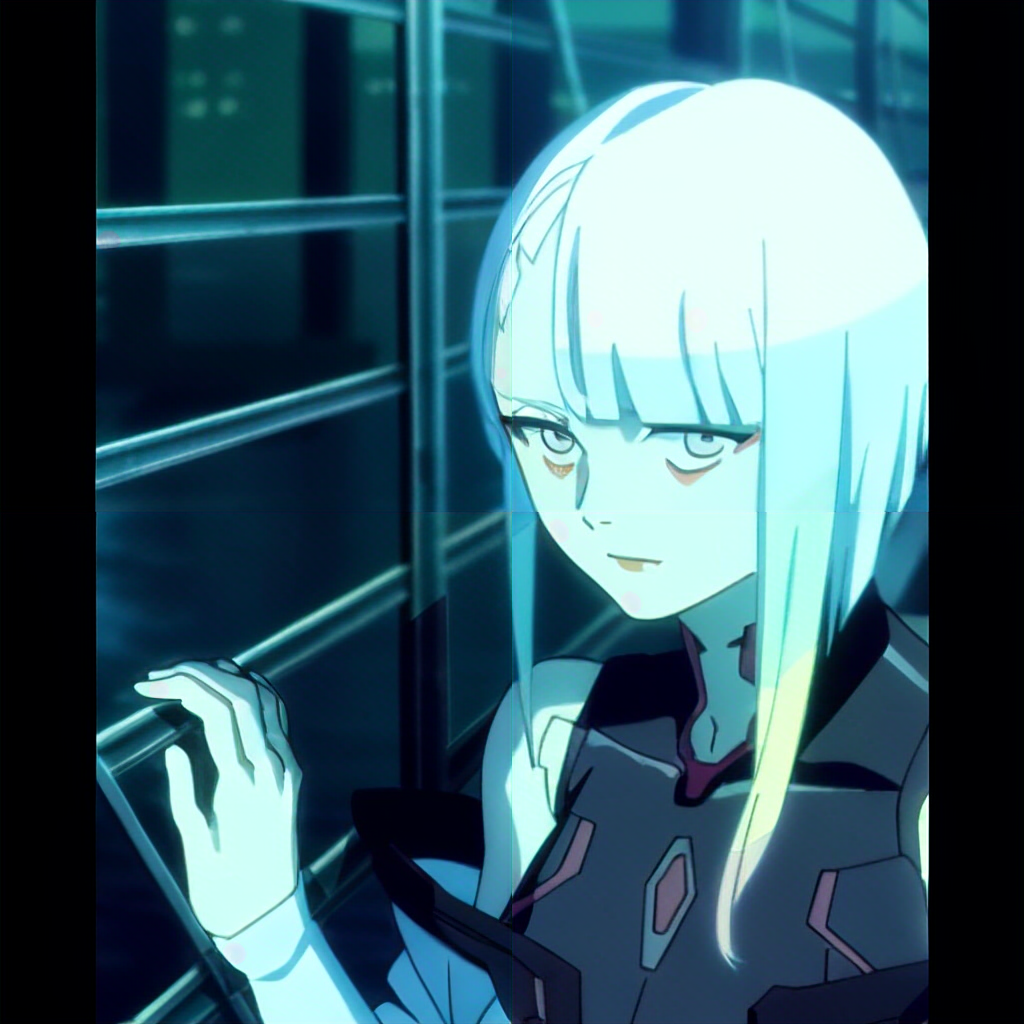

In [11]:
tiled_tokenizer.pil_from_img_toks(tokens)[0]